## Experiment 2: Power-FDR Curves

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from fdrc.filters import build_filter
from fdrc.plots import plot_dataset
from fdrc.utils import load_experiment
from fdrc.artificial_data import make_gaussian_hypotheses
from fdrc.experiment2 import make_fdp_curve

def plot_sample(dataset, filter_name, filter_params):
    _, state = build_filter(filter_name, filter_params).step(dataset["p_values"])
    return plot_dataset(dataset, thresholds=state.threshold_history)


# Results directory:
EXPERIMENT_DIR = Path("../results/experiment2")
SAMPLES_DIR = Path("../samples/experiment2")

# Fixed Noise and Anomaly Ratio

In [2]:
parameters, datasets, results = load_experiment(SAMPLES_DIR / "default_sample")

### Sample with DecayLord

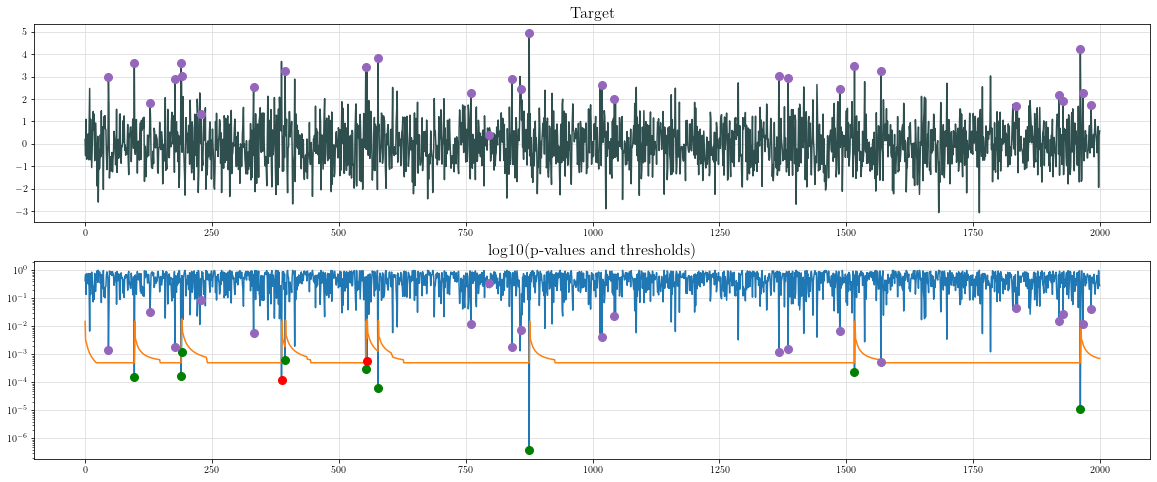

In [3]:
plot_sample(datasets[0], "DecayLORDFilter", dict(fdr_target=0.05, gamma_size=50, delta=0.99))

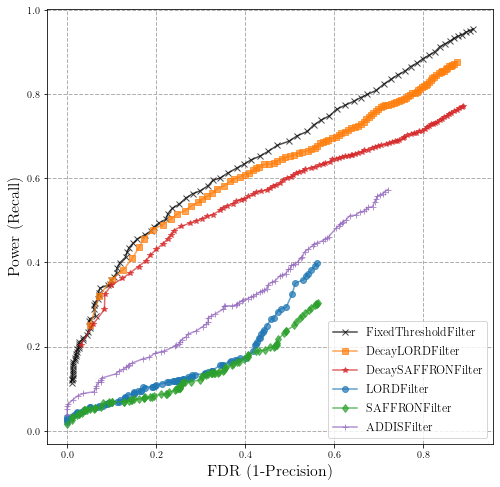

In [4]:
make_fdp_curve(results)

## Increasing Noise  + Fixed Anomaly Ratio

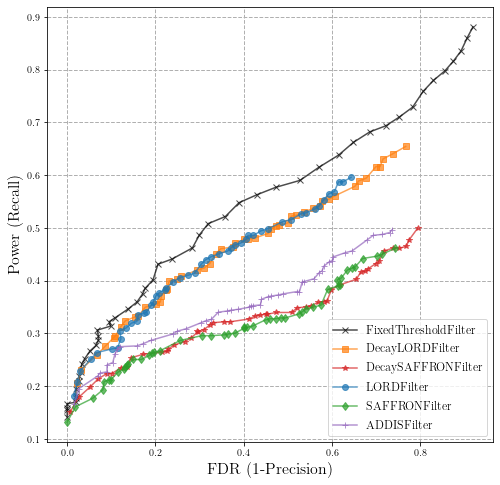

In [5]:
_, _, results = load_experiment(SAMPLES_DIR / "increasing_noise_sample")
make_fdp_curve(results)

## Fixed Noise + Increasing Anomaly Rate

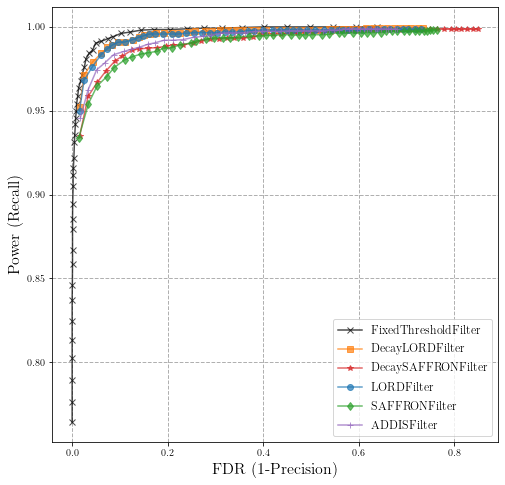

In [6]:
_, _, results = load_experiment(SAMPLES_DIR / "increasing_anomaly_sample")
make_fdp_curve(results)

## Increasing Signal Strength

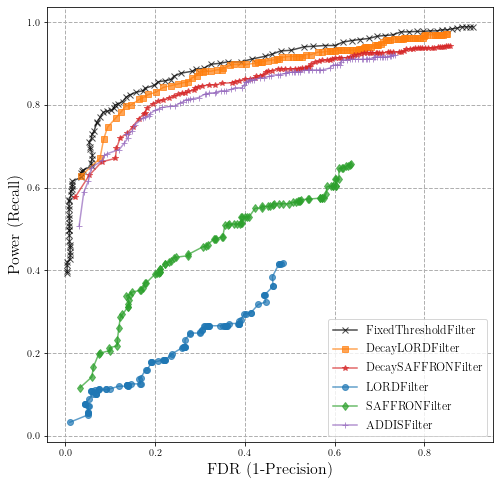

In [7]:
_, _, results = load_experiment(SAMPLES_DIR / "increasing_signal_strength_sample")
make_fdp_curve(results)

## Decreasing Signal Strength

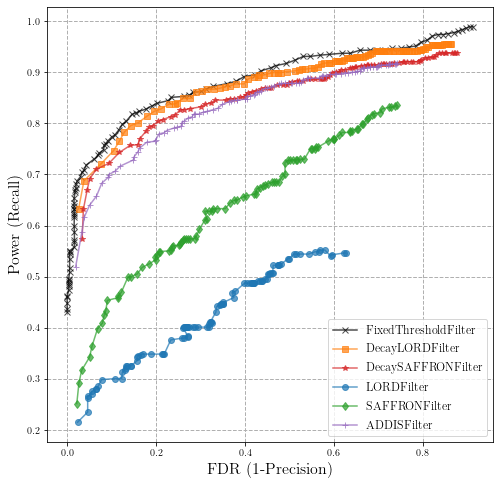

In [8]:
_, _, results = load_experiment(SAMPLES_DIR / "decreasing_signal_strength_sample")
make_fdp_curve(results)

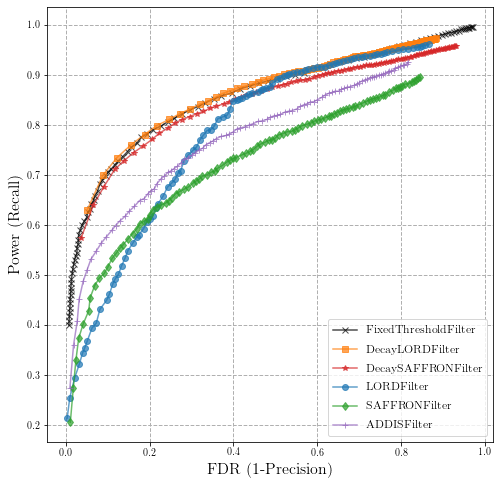

In [8]:
_, _, results = load_experiment(EXPERIMENT_DIR / "piecewise-2-2021-06-03-20-52-22")
fig = make_fdp_curve(results)
fig

In [10]:
fig.savefig(str(EXPERIMENT_DIR / "piecewise-2-2021-06-03-20-52-22" / "fdp_curve.pdf"))

## SMD Experiment

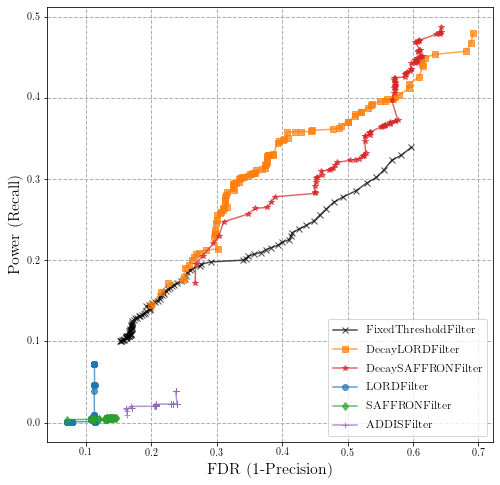

In [3]:
SMD_EXPERIMENT_DIR = Path("../results/experiment_smd")
recipe, data, results = load_experiment(SMD_EXPERIMENT_DIR / "p10-2021-08-09-12-26-44")
fig = make_fdp_curve(results)
fig


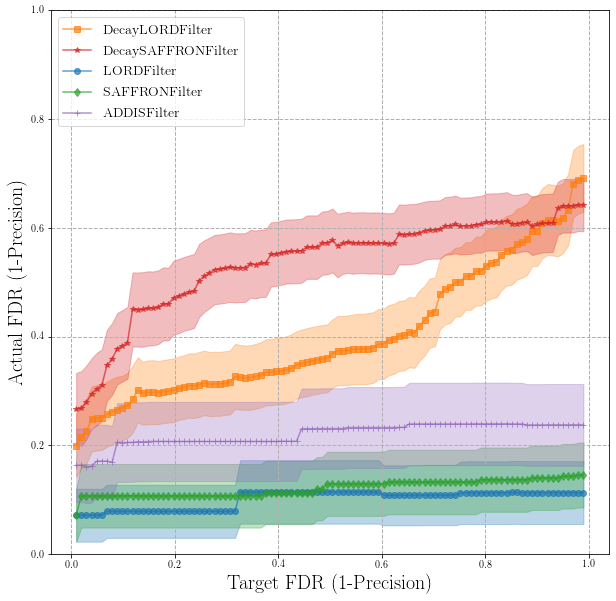

In [73]:
def plot_smd(results, recipe, metric, y_label):
    
    filter_results = [
        result for result in results if result["name"] != "FixedThresholdFilter"
    ]

    y_errors = [
        np.asarray([x for _, x in result[metric]]) / np.sqrt(28)
        for result in filter_results
    ]

    return plot_curves(
        x = [recipe["fdr_targets"]] * len(filter_results), 
        y = [[x for x, _ in result[metric]] for result in filter_results],
        y_errors=y_errors,
        filter_names=[result["name"] for result in filter_results],
        fig_size=(10, 10),
        label_size=20,
        legend_size=14,
        x_label="Target FDR (1-Precision)",
        y_label=y_label,
        x_lim=(0, 1),
        y_lim=(0, 1),
    )

plot_smd(results, recipe, "fdr", y_label="Actual FDR (1-Precision)")

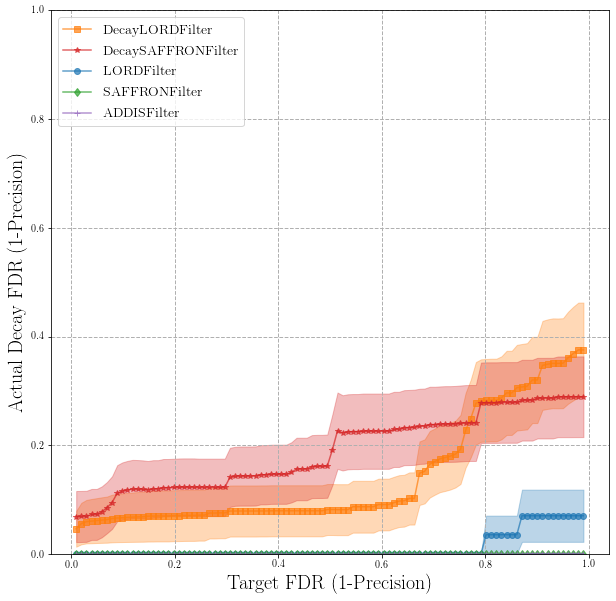

In [74]:
plot_smd(results, recipe, "decay_fdr", y_label="Actual Decay FDR (1-Precision)")


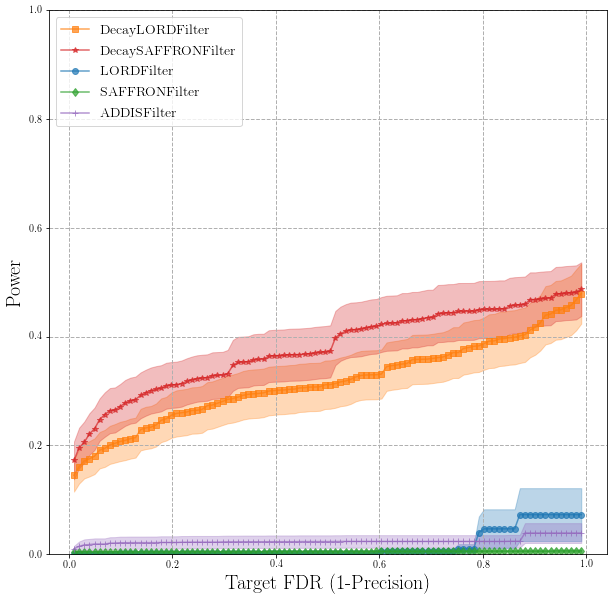

In [75]:
plot_smd(results, recipe, "power", y_label="Power (Recall)")